In [2]:
# импорт пакетов
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

names = {'Serial Number', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population'}

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# чтение данных
df = pd.read_csv(r'covid_worldwide.csv')
df.fillna(0)


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,0,0
227,228,Vatican City,29,0,29,0,0,799
228,229,Western Sahara,10,1,9,0,0,"626,161"
229,230,MS Zaandam,9,2,7,0,0,0


Изменение типа записей

In [19]:

for nam in names: 
    df[nam] = df[nam].replace(',', '', regex=True)
    df[nam] = df[nam].astype(float)

df['Country'] = df['Country'].astype(str)


df.dtypes

Serial Number                float64
Country                       object
Total Cases                  float64
Total Deaths                 float64
Total Recovered              float64
Active Cases                 float64
Total Test                   float64
Population                   float64
Total Deaths_ismissing          bool
Total Recovered_ismissing       bool
Active Cases_ismissing          bool
Total Test_ismissing            bool
Population_ismissing            bool
num_missing                    int64
dtype: object

Тепловая карта

<AxesSubplot:>

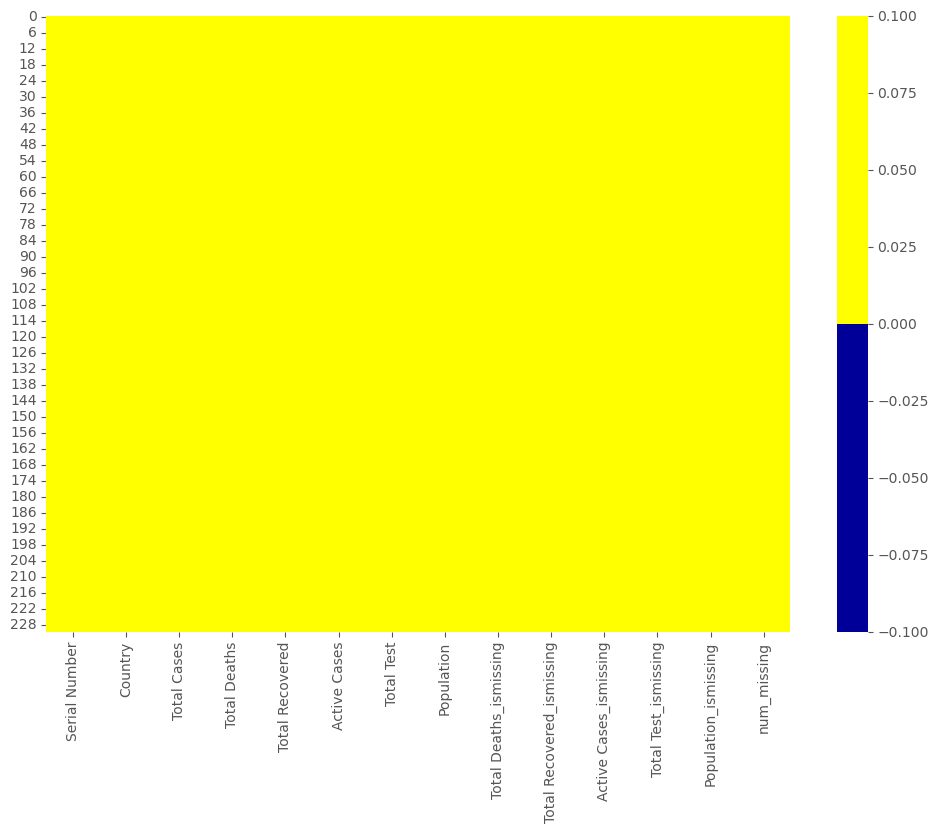

In [29]:
#тепловая карта
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [28]:
#пропущенный список в процентах
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Serial Number - 0%
Country - 0%
Total Cases - 0%
Total Deaths - 0%
Total Recovered - 0%
Active Cases - 0%
Total Test - 0%
Population - 0%
Total Deaths_ismissing - 0%
Total Recovered_ismissing - 0%
Active Cases_ismissing - 0%
Total Test_ismissing - 0%
Population_ismissing - 0%
num_missing - 0%


Гистограмма пропущенных данных

<AxesSubplot:xlabel='index'>

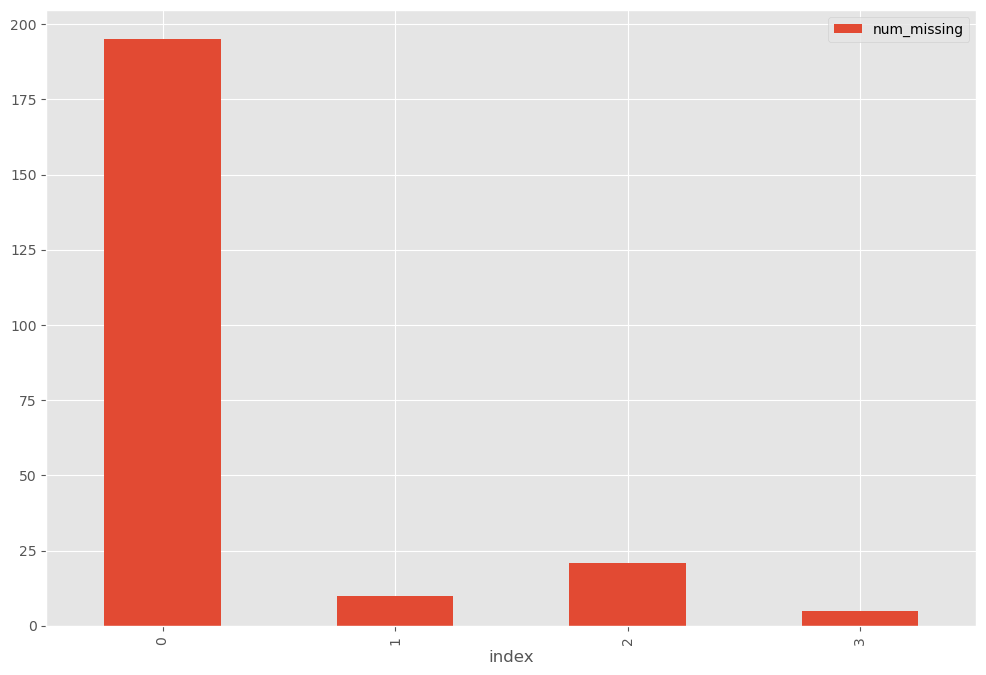

In [27]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Отбрасывание строк с большим количеством пропуском

In [23]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

Внесение недостающих значений

In [24]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Total Deaths
imputing missing values for: Total Recovered
imputing missing values for: Active Cases
imputing missing values for: Total Test
imputing missing values for: Population


Гистограмма/коробчатая диаграмма

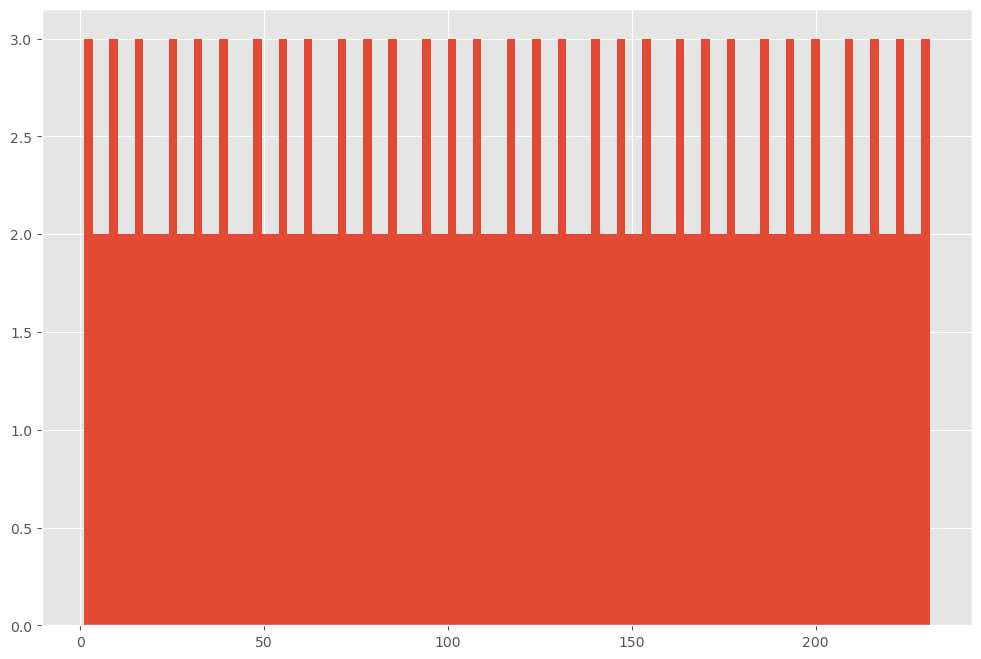

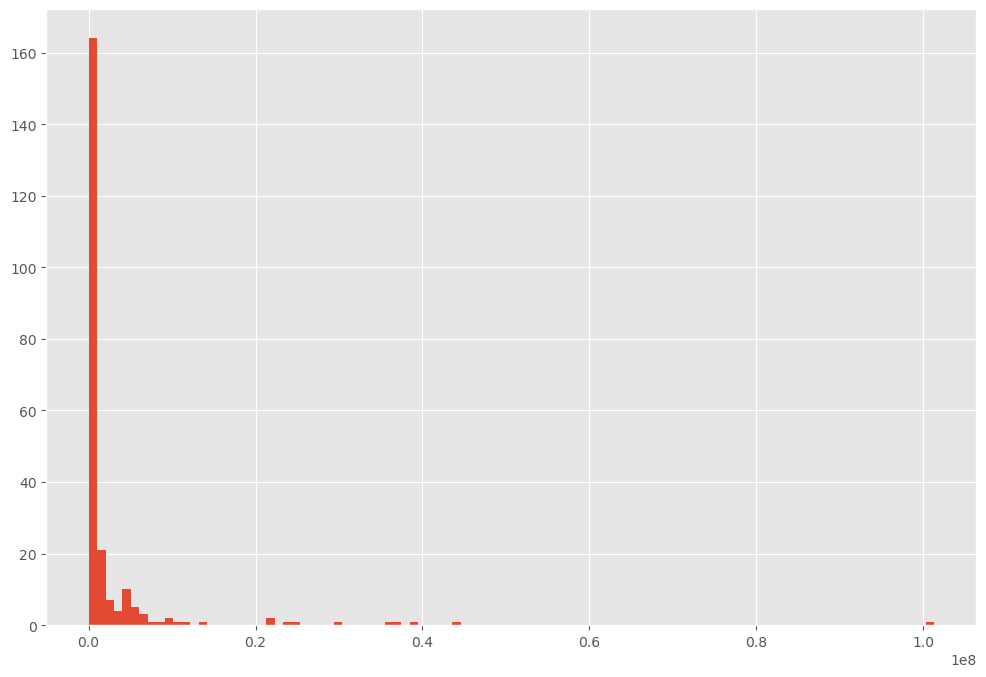

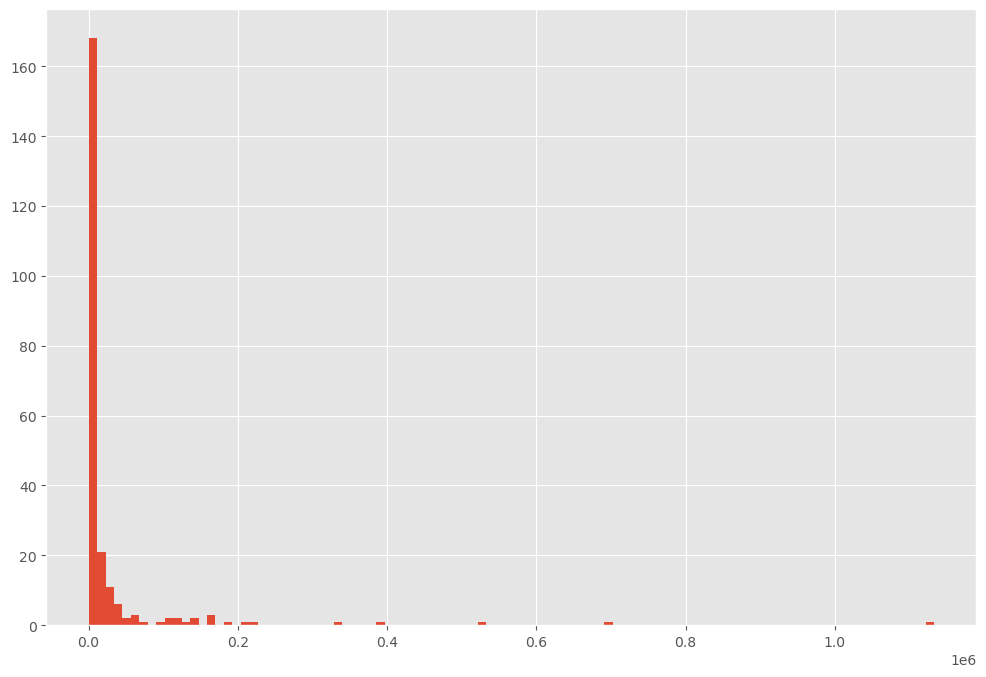

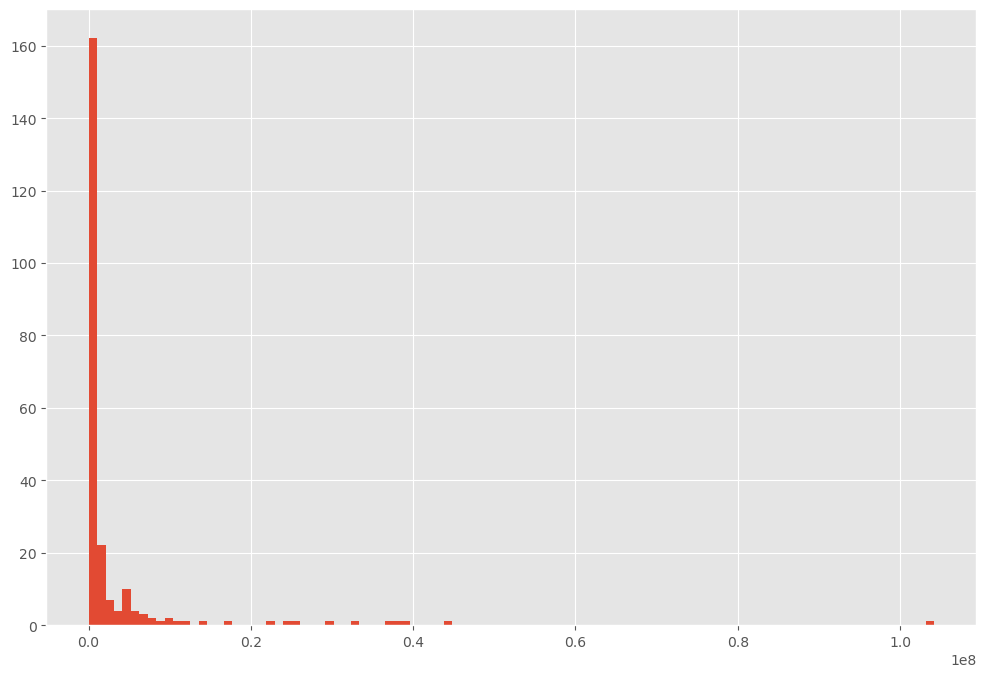

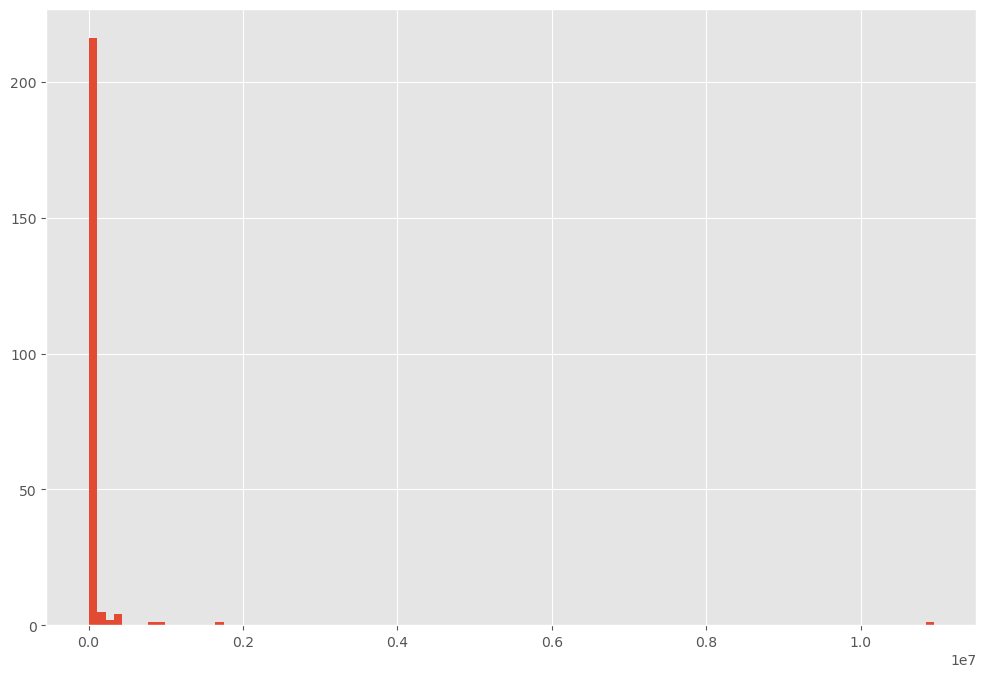

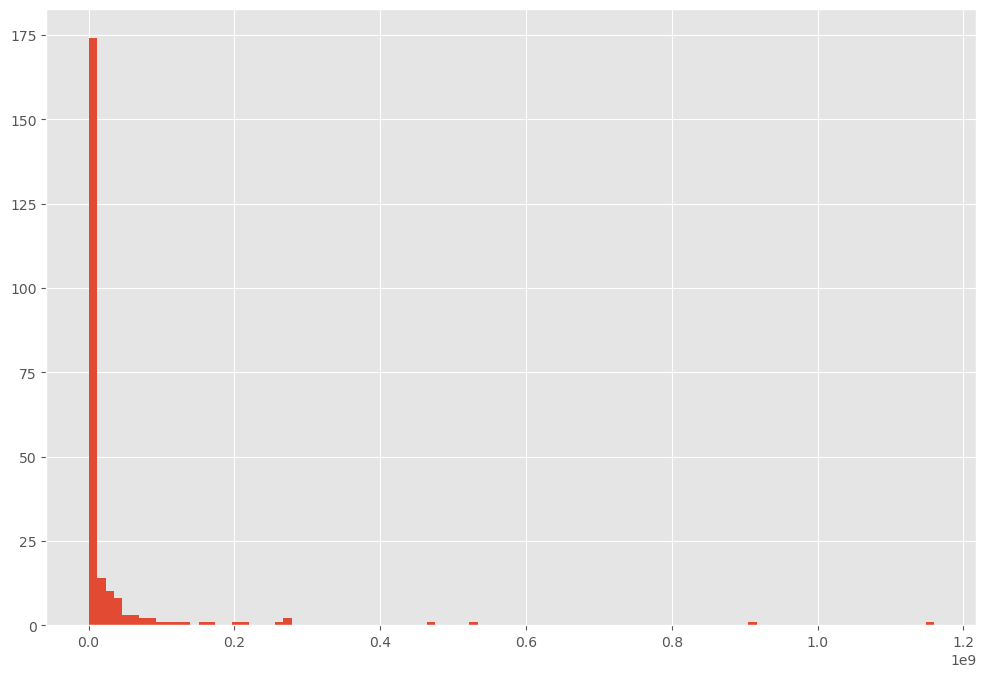

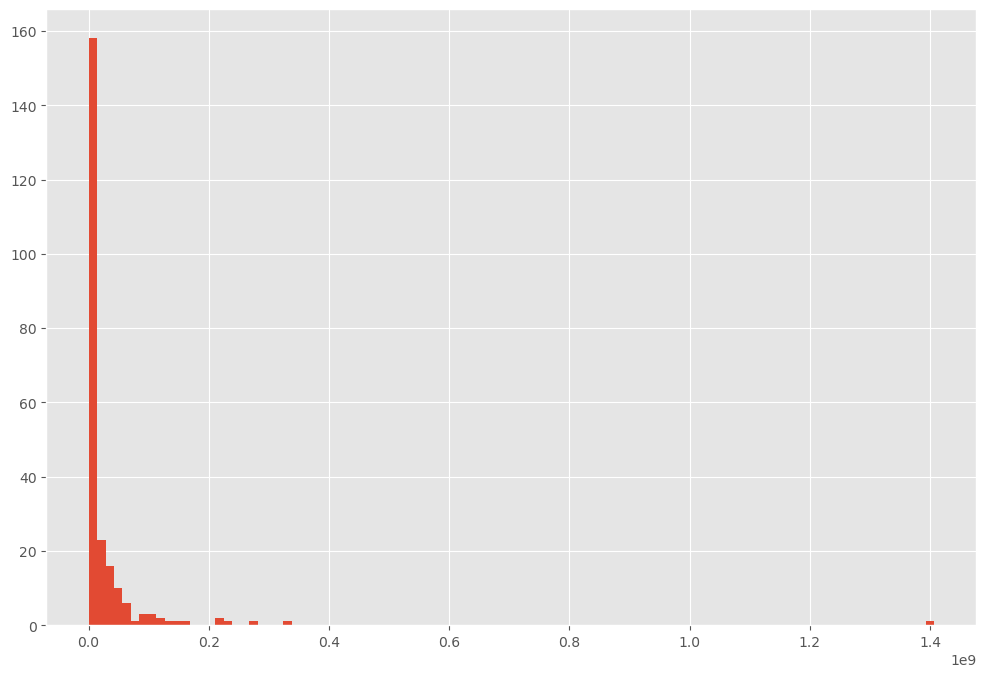

In [31]:
for n in names:
    plt.figure()
    df[n].hist(bins=100)


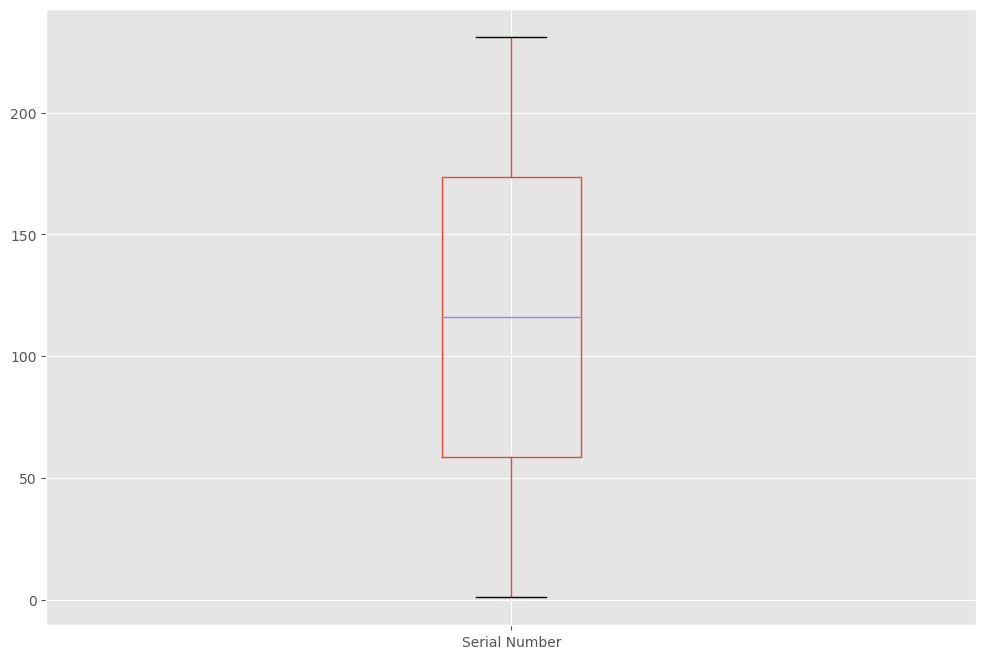

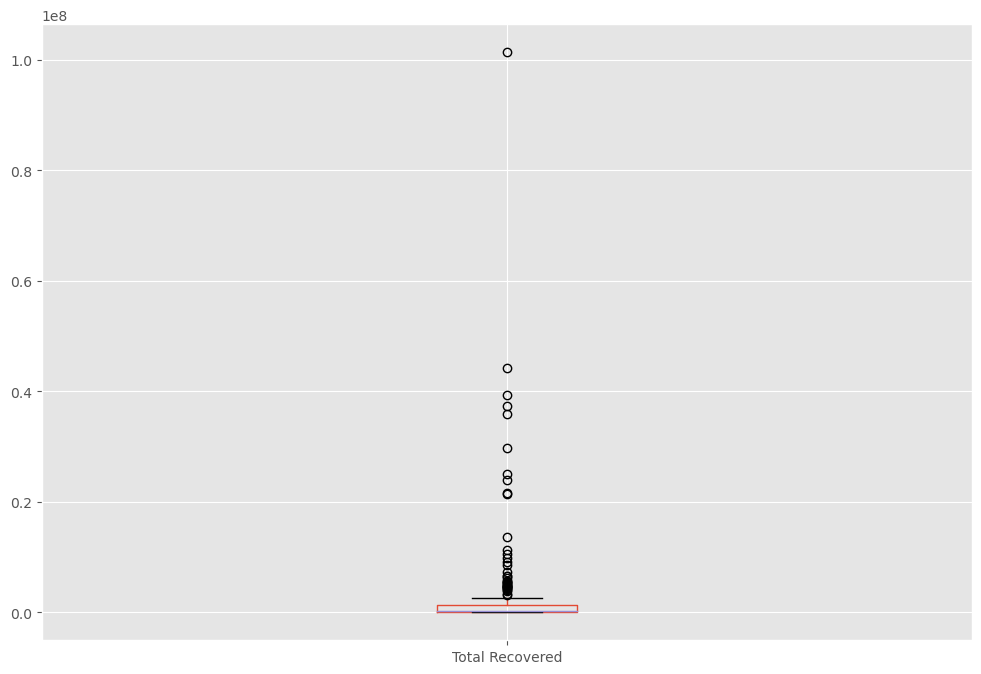

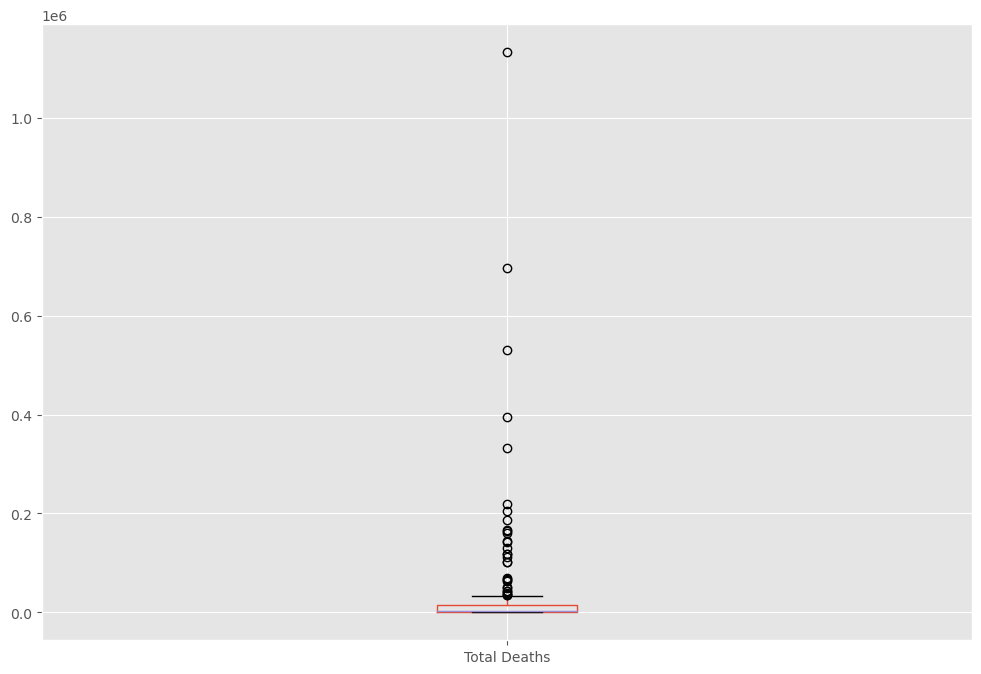

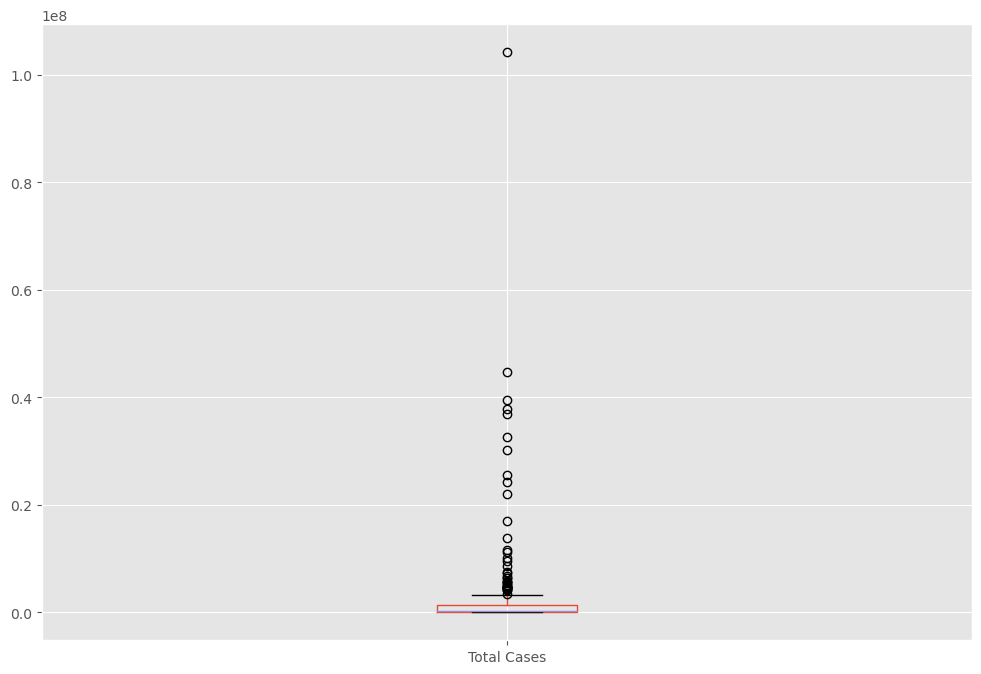

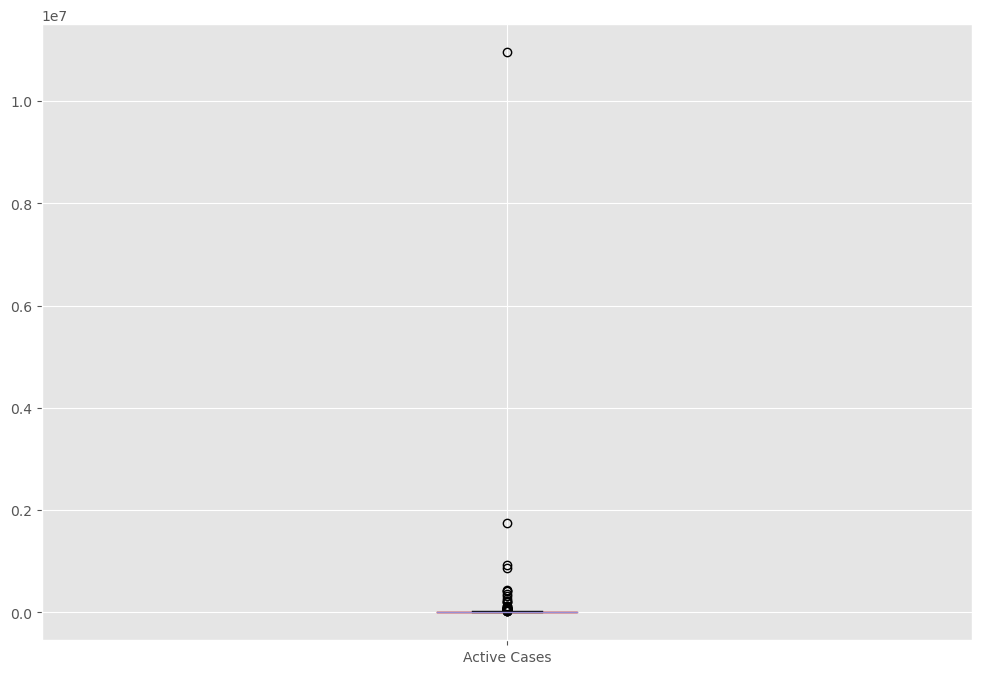

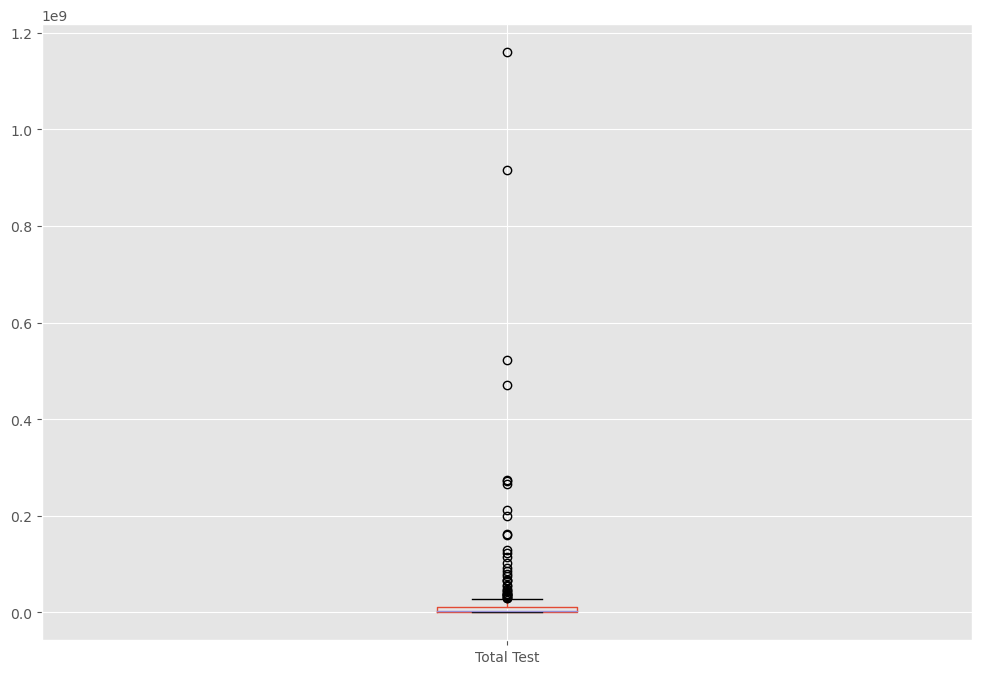

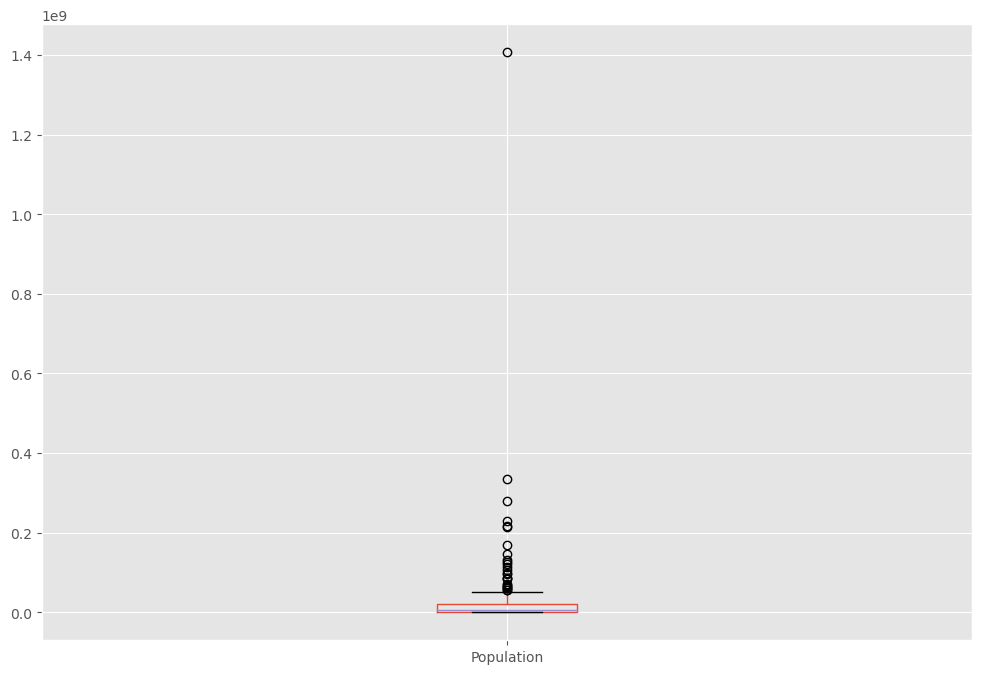

In [34]:
for n in names: 
    plt.figure()
    df.boxplot(column=[n])

Описательная статистика

In [38]:
for n in names: 
    print(df[n].describe())
    print()

count    231.000000
mean     116.000000
std       66.828138
min        1.000000
25%       58.500000
50%      116.000000
75%      173.500000
max      231.000000
Name: Serial Number, dtype: float64

count    2.310000e+02
mean     2.743109e+06
std      9.109928e+06
min      2.000000e+00
25%      2.845900e+04
50%      2.351455e+05
75%      1.255186e+06
max      1.013228e+08
Name: Total Recovered, dtype: float64

count    2.310000e+02
mean     2.933365e+04
std      1.040919e+05
min      1.000000e+00
25%      2.250000e+02
50%      2.179000e+03
75%      1.390850e+04
max      1.132935e+06
Name: Total Deaths, dtype: float64

count    2.310000e+02
mean     2.923460e+06
std      9.479286e+06
min      5.000000e+00
25%      2.400100e+04
50%      2.065920e+05
75%      1.296146e+06
max      1.041969e+08
Name: Total Cases, dtype: float64

count    2.310000e+02
mean     8.360581e+04
std      7.344685e+05
min      0.000000e+00
25%      6.300000e+01
50%      1.115000e+03
75%      9.328500e+03
max      1.

Столбчатая диаграмма

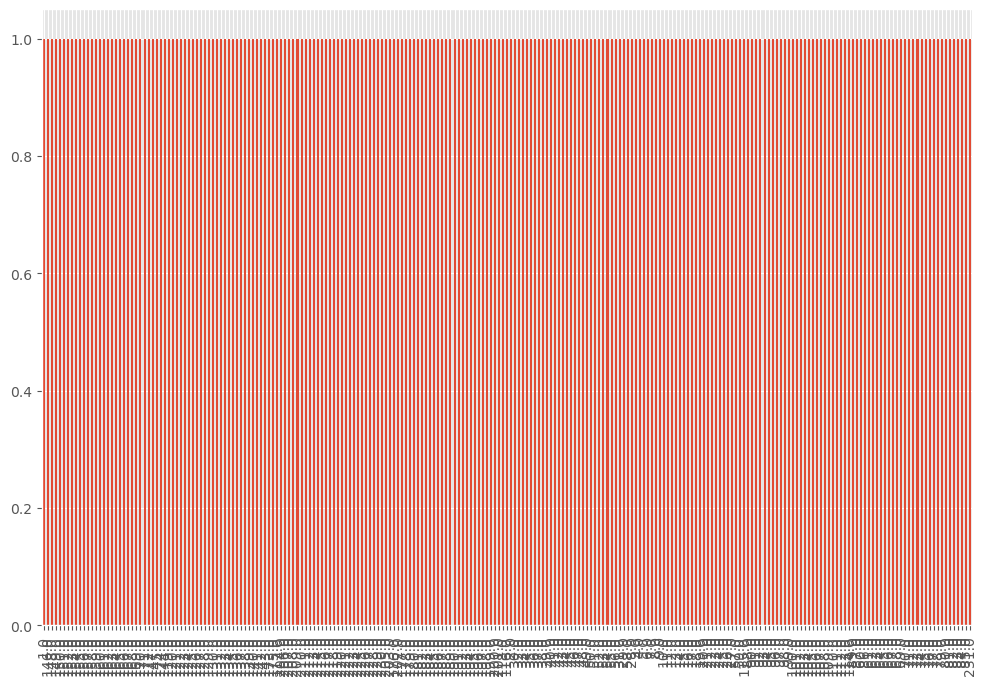

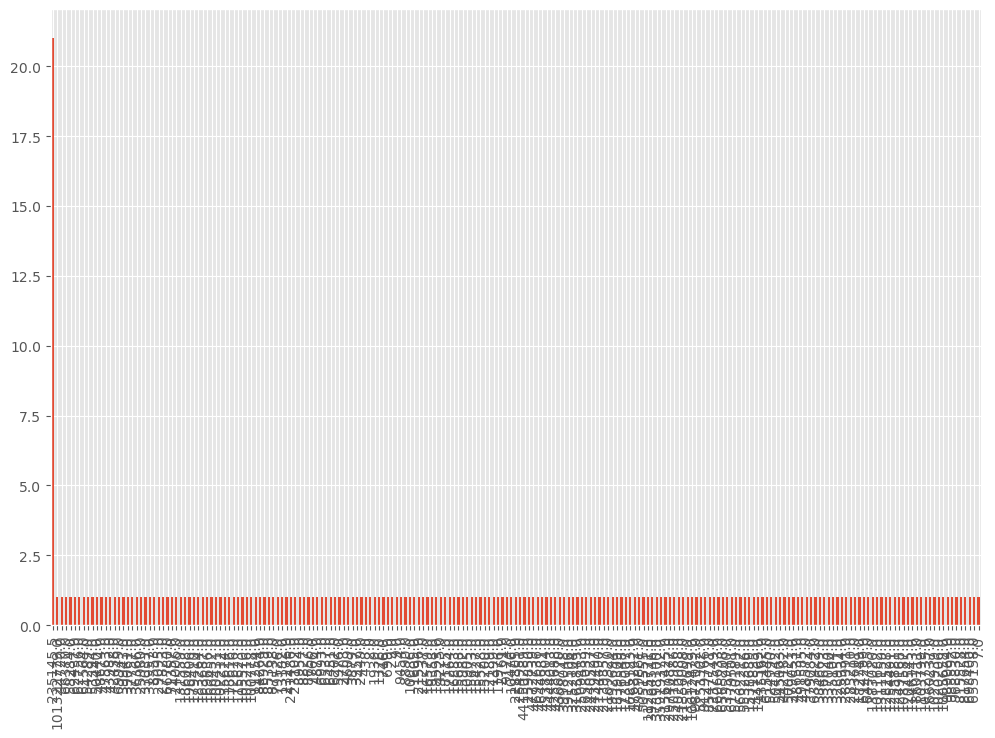

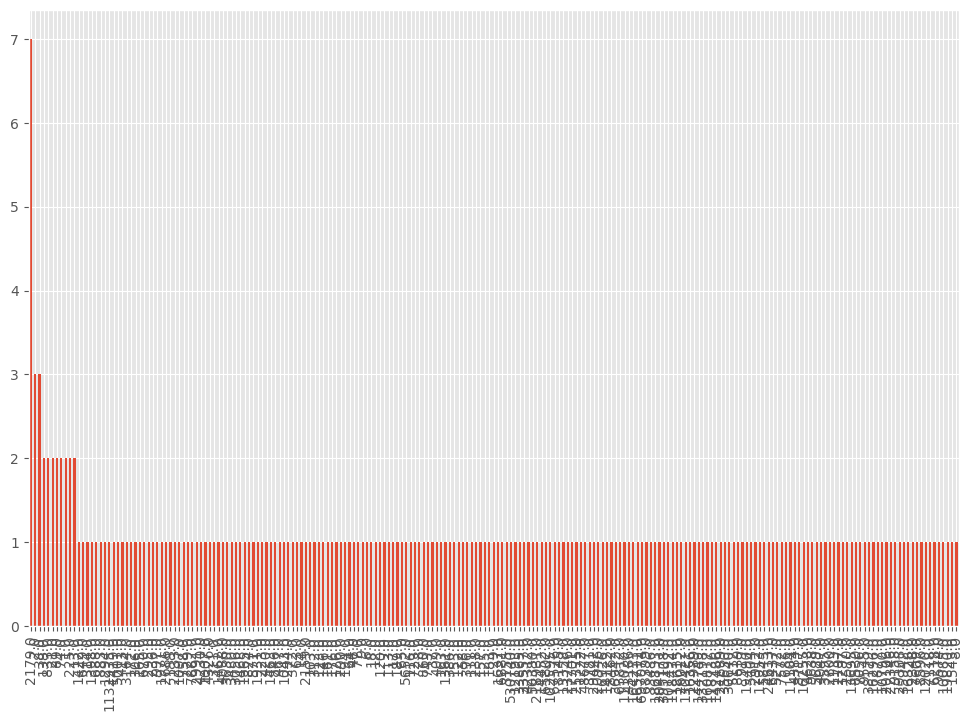

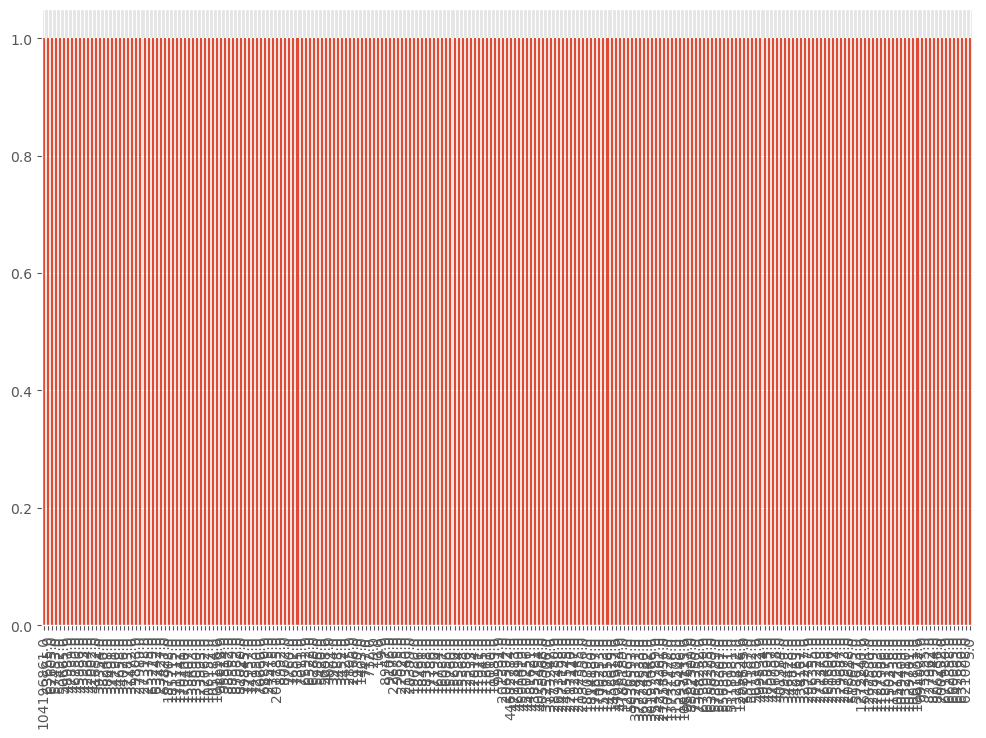

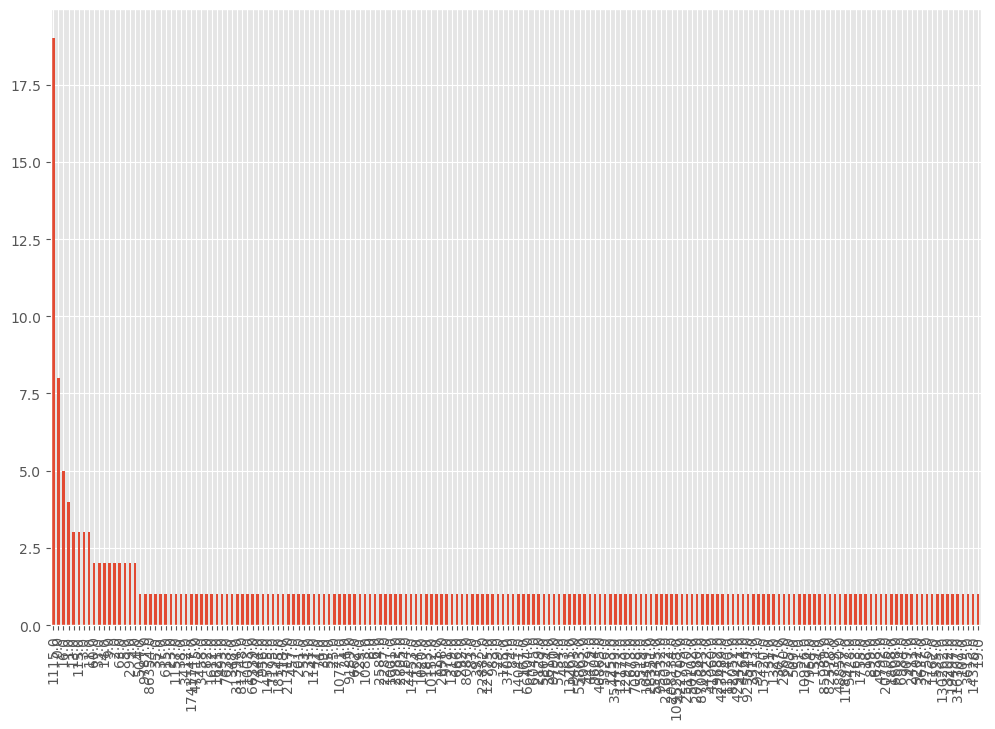

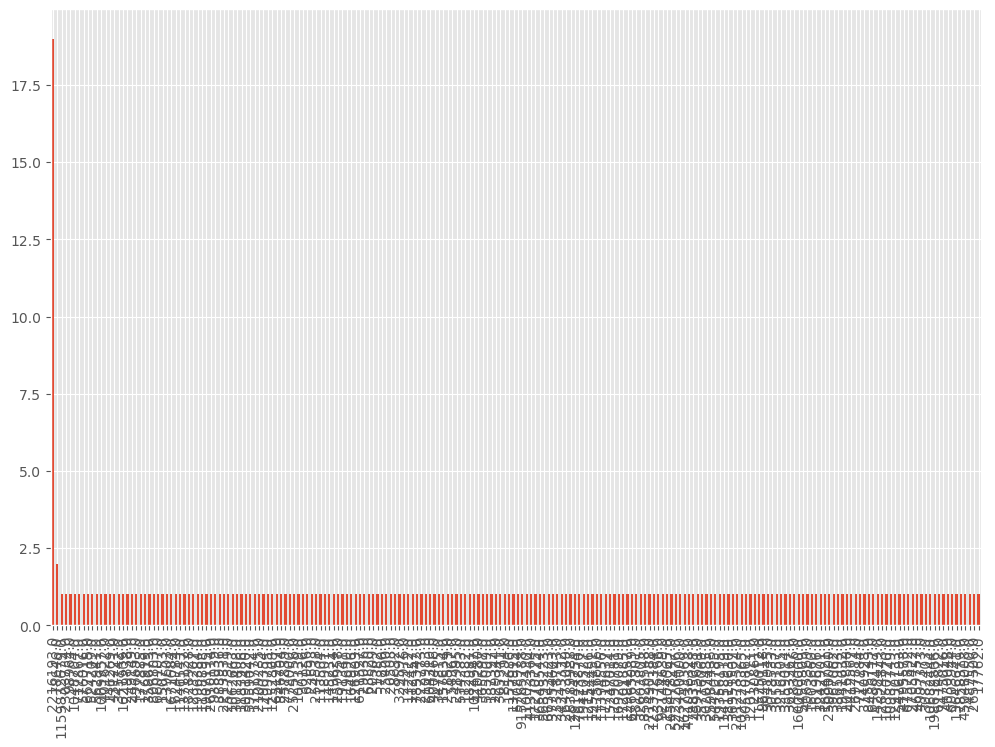

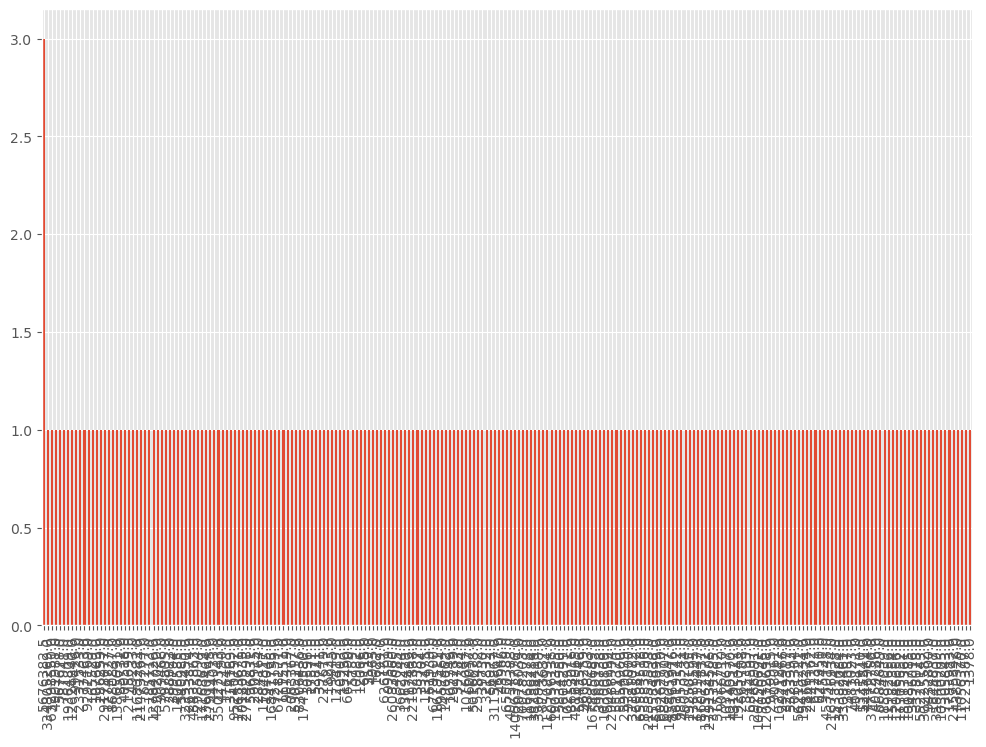

In [40]:
for n in names: 
    plt.figure()
    df[n].value_counts().plot.bar()

Неинформативные признаки

In [41]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#но тут выводиться информация о тех строках, которые мы уже заполнили

Total Deaths_ismissing: 97.40260%
False    225
True       6
Name: Total Deaths_ismissing, dtype: int64

Population_ismissing: 98.70130%
False    228
True       3
Name: Population_ismissing, dtype: int64



Отбрасываем неуникальные записи

Нужно разобраться с выбросами, так как дроп нужно ложить на условие, значения которых мы получили на гистограммах

In [45]:
# отбрасываем неуникальные строки
for n in names:
    df_dedupped = df.drop(n, axis=0).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

#отбросился столбец со значениями пропусков, который не несет в себе никакой нагрузки

ValueError: No axis named -1 for object type DataFrame